<h2 style = "color : Brown">  Exploratory Data Analysis - Lending Club Case Study </h2>

In [1]:
#Mention business Case

## Mention the column of analysis.. 


In [2]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
#Import the data and use the basic commands to understand it
df = pd.read_csv('loan.csv')

C:\Users\madevada\AppData\Local\Temp\ipykernel_26836\156808305.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [4]:
#Displaying Basic Information About The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Number Of Rows & Columns
df.shape

(39717, 111)

<h3 style = "color : Blue"> Data Cleaning </h3>   

In [7]:
##### Too many columns(111)  -- need to find which ones have proper data and which ones doesnt and will drop them

#### Missing Values identification and Treatment

Dropping The Variables Which has more than 40% of null values as they do not add much value to EDA

In [8]:
#Calculating The Null Percentage
null_percentages = (df.isnull().sum() / len(df)) * 100

In [9]:
#Creating The List of Columns With Less Than 40% Null Values
keep_columns=null_percentages[null_percentages <= 40].index

In [10]:
df = df[keep_columns]

In [11]:
df.shape

(39717, 54)

In [12]:
df.to_csv('filtered_df.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### <font color="Green"> Columns with all zeroes or blanks. 

In [14]:
((df.isnull() | (df == "") | (df == 0.0)).sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                 129
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                             183
delinq_2yrs                   35405
earliest_cr_line                  0
inq_last_6mths              

In [15]:
df1series = ((df.isnull() | (df == "") | (df == 0.0)).sum())

In [16]:
df1series[df1series == (df.shape[0])]

collections_12_mths_ex_med    39717
acc_now_delinq                39717
chargeoff_within_12_mths      39717
delinq_amnt                   39717
tax_liens                     39717
dtype: int64

#### <font color="blue"> Upon further analysis </font>
* pymnt_pln  - n for all
* url - constructed with loan id, so can be considered as a duplicate of loan id
* initial_list_status - f for all
* policy_code  - (1) same for all
* application Type - "Individual" for all
* Columns to be dropped
  - pymnt_pln
  -initial_list_status1
  policy_code
  - application Type
  - acc_now_delinq
  - delinq_amnt
  - tax_liensnt 3
d 



In [17]:
columns_to_drop = ['pymnt_plan', 'url', 'initial_list_status', 'policy_code', 'application_type', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

In [18]:
df.drop(columns_to_drop,  axis=1, inplace=True)

#### Verify missing values in rows

In [19]:
nullinrows = (df.isnull().sum(axis=1))

In [20]:
nullinrows.max()

4

#### <font color="Green">  No rows have a lot of nulls

In [21]:
df.shape

(39717, 44)

In [22]:
duplicate_rows = df.duplicated()
duplicate_rows[duplicate_rows==True]

Series([], dtype: bool)

#### <font color="Green"> No Duplicates

In [23]:
### Find out columns with nulls, if less no of rows, will delete those rows. 
df1nullmean = df.isnull().mean()

In [24]:
df1nullmean[(df1nullmean > 0.0)]

emp_title               0.061913
emp_length              0.027066
desc                    0.325855
title                   0.000277
revol_util              0.001259
last_pymnt_d            0.001788
last_credit_pull_d      0.000050
pub_rec_bankruptcies    0.017549
dtype: float64

In [25]:
df1nullmean[(df1nullmean > 0.0) & (df1nullmean < 0.1)]

emp_title               0.061913
emp_length              0.027066
title                   0.000277
revol_util              0.001259
last_pymnt_d            0.001788
last_credit_pull_d      0.000050
pub_rec_bankruptcies    0.017549
dtype: float64

In [26]:
df1nullmean[(df1nullmean > 0.0) & (df1nullmean > 0.1)]

desc    0.325855
dtype: float64

#### **Apart from desc lets delete the corresponding rows intead of imputing since that makes a better sense.** </font>
########



In [27]:
columns_to_check = ['emp_title','emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']

In [28]:
df.dropna(subset=columns_to_check, how='any', inplace=True)

In [29]:
df1nullmean = df.isnull().mean()
df1nullmean[(df1nullmean > 0.0)]

desc    0.330113
dtype: float64

In [30]:
#### **.** </font>
########

In [31]:
df.shape

(36433, 44)

#### Find blanks

In [32]:
blanksum = (df == "").sum()

In [33]:
blanksum[blanksum > 0]

Series([], dtype: int64)

In [34]:
df.shape

(36433, 44)

####  <font color="Green"> **The loan status is the dependent column, which we are analysing against other columns**

* Need **Charged Off** and **Fully Paid** rows
* rows with loan_status **Current** can be dropped

In [35]:
df= df[df['loan_status'] != 'Current']

In [36]:
df.shape

(35367, 44)

####  <font color="Green"> **Impute Values** </font>
* Nulls
    * desc - fill with 'no description provided'

      

In [37]:
#df1.fillna('No description provided', inplace=True)

df['desc'] = df['desc'].fillna('No description provided')


In [38]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [39]:
df.to_csv('loancleaned.csv', index=False)


####  <font color="Green"> **Standardise** </font>
* term to term_months
* int_rate and revol_util - remove % 
* Dates to datetime
   * issue_d
   * earliest_cr_line
   * 
last_pymn_ 
   * 
last_credit_pull_d

In [40]:
df.rename(columns={'term': 'term_in_mnths'}, inplace=True)
# Extract the numerical part and convert to integer
df['term_in_mnths'] = df['term_in_mnths'].str.extract('(\d+)').astype(int)
df['term_in_mnths'].info

<bound method Series.info of 1        60
3        36
5        36
6        60
7        36
         ..
39551    36
39562    36
39623    36
39666    36
39680    36
Name: term_in_mnths, Length: 35367, dtype: int32>

In [41]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

In [42]:
df['int_rate'].head()

1    15.27
3    13.49
5     7.90
6    15.96
7    18.64
Name: int_rate, dtype: float64

In [43]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)

In [44]:
df['revol_util'].head()

1     9.4
3    21.0
5    28.3
6    85.6
7    87.5
Name: revol_util, dtype: float64

In [45]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_mnths,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [46]:
df.issue_d

1        Dec-11
3        Dec-11
5        Dec-11
6        Dec-11
7        Dec-11
          ...  
39551    Dec-07
39562    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 35367, dtype: object

In [47]:
df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,Dec-11,Apr-99,Apr-13,Sep-13
3,Dec-11,Feb-96,Jan-15,Apr-16
5,Dec-11,Nov-04,Jan-15,Jan-16
6,Dec-11,Jul-05,May-16,May-16
7,Dec-11,Jan-07,Jan-15,Dec-14
...,...,...,...,...
39551,Dec-07,Dec-00,Feb-10,May-14
39562,Nov-07,Mar-00,Aug-08,Aug-08
39623,Oct-07,Aug-97,May-08,May-16
39666,Aug-07,Nov-92,Oct-09,Mar-10


In [48]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [49]:
df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
5,2011-12-01,2004-11-01,2015-01-01,2016-01-01
6,2011-12-01,2005-07-01,2016-05-01,2016-05-01
7,2011-12-01,2007-01-01,2015-01-01,2014-12-01
...,...,...,...,...
39551,2007-12-01,2000-12-01,2010-02-01,2014-05-01
39562,2007-11-01,2000-03-01,2008-08-01,2008-08-01
39623,2007-10-01,1997-08-01,2008-05-01,2016-05-01
39666,2007-08-01,1992-11-01,2009-10-01,2010-03-01


#### <font color="Green">**Find Outliers**

In [50]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_mnths,int_rate,installment,annual_inc,issue_d,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,3.536700e+04,3.536700e+04,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,3.536700e+04,35367,...,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367.000000,35367,35367.00000,35367,35367.000000
mean,6.843436e+05,8.530616e+05,11133.071790,10866.525999,10427.124106,42.100602,11.983468,324.043982,6.909599e+04,2010-11-12 19:16:02.829756672,...,11544.554967,9766.376425,2157.070677,1.306102,95.654256,12.029025,2013-03-27 12:38:00.498769920,2813.59290,2014-09-11 17:46:50.314700032,0.041677
min,5.574200e+04,1.124930e+05,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,2007-08-01 00:00:00,...,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,2008-05-01 00:00:00,0.01000,2008-03-01 00:00:00,0.000000
25%,5.193715e+05,6.709390e+05,5500.000000,5500.000000,5000.000000,36.000000,8.940000,167.840000,4.150000e+04,2010-05-01 00:00:00,...,5321.415000,4750.000000,662.235000,0.000000,0.000000,0.000000,2012-04-01 00:00:00,224.78500,2013-06-01 00:00:00,0.000000
50%,6.608890e+05,8.450390e+05,10000.000000,9600.000000,9000.000000,36.000000,11.830000,280.620000,6.000000e+04,2011-02-01 00:00:00,...,9395.310000,8000.000000,1331.960000,0.000000,0.000000,0.000000,2013-04-01 00:00:00,602.58000,2015-03-01 00:00:00,0.000000
75%,8.315200e+05,1.040372e+06,15000.000000,15000.000000,14300.000000,60.000000,14.460000,426.640000,8.250000e+04,2011-08-01 00:00:00,...,15619.810000,13500.000000,2722.910000,0.000000,0.000000,0.000000,2014-05-01 00:00:00,3604.44500,2016-04-01 00:00:00,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,2011-12-01 00:00:00,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,2016-05-01 00:00:00,36115.20000,2016-05-01 00:00:00,2.000000
std,2.011581e+05,2.525693e+05,7326.233093,7069.586419,6968.341877,10.449890,3.702512,207.149088,6.396705e+04,NaN,...,8671.919254,6998.669475,2410.568245,7.090080,692.056592,142.972962,NaN,4521.49033,NaN,0.200560


In [65]:
df_numeric = df.select_dtypes(include=['float64', 'int'])
df_numeric

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_mnths,int_rate,installment,annual_inc,dti,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,30000.0,1.00,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,49200.0,20.00,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,36000.0,11.20,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,47004.0,23.51,...,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,48000.0,5.35,...,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,158706,158450,12375,12375,1000.0,36,10.91,404.62,80000.0,9.23,...,0.0,14370.922250,1161.29,12375.00,1995.92,0.00,0.00,0.00,4259.11,1.0
39562,154154,151536,4800,4800,1100.0,36,10.28,155.52,35000.0,7.51,...,0.0,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,3891.08,1.0
39623,132892,132889,9000,9000,700.0,36,12.49,301.04,39000.0,5.08,...,0.0,4015.960000,311.64,1496.83,609.26,0.00,1909.87,668.36,301.05,1.0
39666,119043,119040,15450,15450,600.0,36,11.22,507.46,40000.0,13.50,...,0.0,11652.750000,451.73,8688.59,2659.96,0.00,304.20,3.09,1016.15,1.0


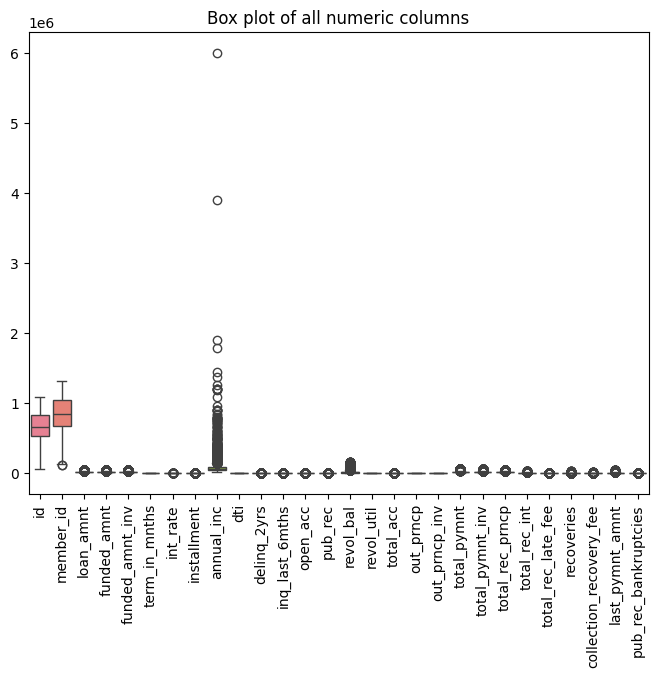

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title('Box plot of all numeric columns')
plt.show()

In [77]:
## Annual income seems to have a lot of outliers
pd.options.display.float_format = '{:20,.2f}'.format
df["annual_inc"].describe()

count              35,367.00
mean               69,095.99
std                63,967.05
min                 4,000.00
25%                41,500.00
50%                60,000.00
75%                82,500.00
max             6,000,000.00
Name: annual_inc, dtype: float64

In [97]:
# This will include the 95th percentile in the summary statistics
df['annual_inc'].describe(percentiles=[.05, .25, .5, .75, .95, .98])


count              35,367.00
mean               69,095.99
std                63,967.05
min                 4,000.00
5%                 24,960.00
25%                41,500.00
50%                60,000.00
75%                82,500.00
95%               140,000.00
98%               182,498.72
max             6,000,000.00
Name: annual_inc, dtype: float64

In [105]:
df[(df['annual_inc'] > 182499)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_mnths,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
170,1067434,1301822,25000,25000,"25,000.00",36,12.42,835.39,B,B4,...,"30,073.68","25,000.00","5,073.68",0.00,0.00,0.00,2015-01-01,842.08,2014-12-01,0.00
336,1065110,1299187,35000,23150,"21,739.75",60,17.27,578.71,D,D3,...,"23,136.20","23,150.00","2,866.92",0.00,0.00,0.00,2012-10-01,"21,393.19",2016-05-01,0.00
392,1064548,1298574,5000,5000,"5,000.00",36,6.62,153.52,A,A2,...,"5,526.66","5,000.00",526.66,0.00,0.00,0.00,2015-01-01,166.04,2014-12-01,0.00
567,1062510,1294575,2000,2000,"2,000.00",36,9.91,64.45,B,B1,...,"2,320.20","2,000.00",320.20,0.00,0.00,0.00,2014-12-01,67.24,2016-05-01,0.00
717,1060831,1292796,28000,28000,"28,000.00",36,15.96,983.85,C,C5,...,"34,735.37","28,000.00","6,735.37",0.00,0.00,0.00,2014-02-01,"10,164.77",2014-03-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38779,330773,330728,10000,5000,"1,525.01",36,10.71,163.01,B,B5,...,646.23,"1,623.98",494.89,0.00,0.00,0.00,2009-05-01,163.01,2016-05-01,0.00
38810,300328,300324,5000,5000,"5,000.00",36,7.68,155.95,A,A2,...,"5,032.00","5,000.00",32.00,0.00,0.00,0.00,2008-05-01,"5,032.00",2008-03-01,0.00
38883,309059,306632,25000,7850,"3,800.00",36,13.24,265.41,D,D3,...,"1,330.81","1,877.01",861.52,14.90,0.00,0.00,2009-07-01,103.40,2016-05-01,0.00
38886,308498,308484,25000,18175,"14,903.25",36,10.08,587.14,B,B3,...,"17,231.66","18,175.00","2,962.04",0.00,0.00,0.00,2011-04-01,621.31,2011-03-01,0.00


C:\Users\madevada\AppData\Local\Temp\ipykernel_26836\2401560446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.annual_inc)


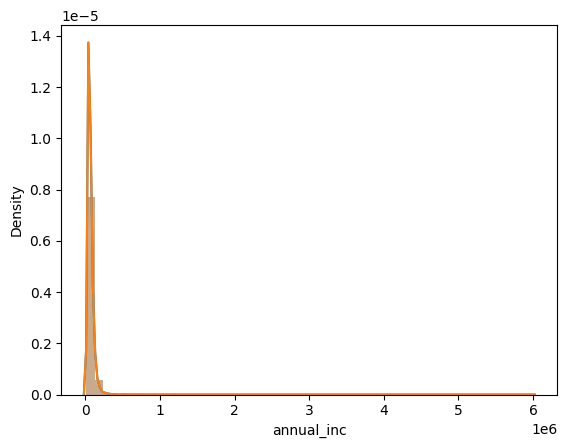

In [104]:
sns.distplot(df.annual_inc)
plt.show()

In [106]:
df = df[(df['annual_inc'] < 182499)]

In [107]:
df.shape

(34659, 44)

C:\Users\madevada\AppData\Local\Temp\ipykernel_26836\2401560446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.annual_inc)


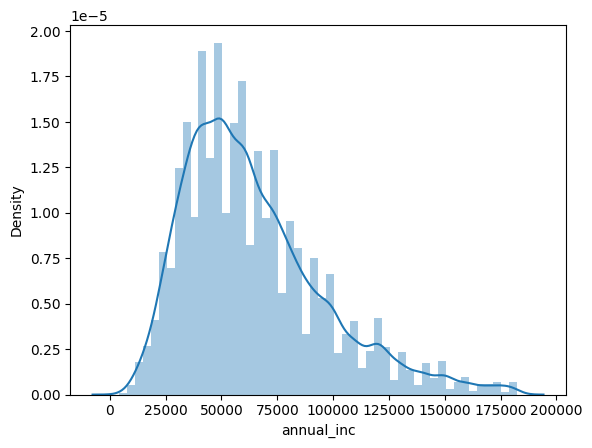

In [108]:
sns.distplot(df.annual_inc)
plt.show()

In [109]:
#Delete 95% lets remove as outliers , since the datapoints looks skewed towards left. 
df = df[(df['annual_inc'] < 140000)]


C:\Users\madevada\AppData\Local\Temp\ipykernel_26836\2401560446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.annual_inc)


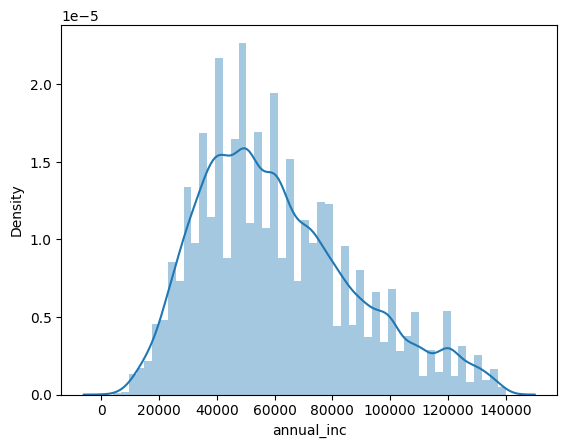

In [110]:
sns.distplot(df.annual_inc)
plt.show()

In [112]:
#Checking revol_bal
df["revol_bal"].describe()

count              33,504.00
mean               12,356.96
std                13,549.61
min                     0.00
25%                 3,660.75
50%                 8,654.00
75%                16,231.00
max               149,000.00
Name: revol_bal, dtype: float64

In [115]:
df[df['revol_bal'] > 16231].loan_status.value_counts()

loan_status
Fully Paid     7087
Charged Off    1287
Name: count, dtype: int64

In [ ]:
# impute the revol_bal with median  -- but its zero will it affect the analysis?
#

In [ ]:
#create issue year column. 
#create last payment year.